In [1]:
import pandas
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pathToDataset = "../../Twitter-Absolute-Sigma-500.csv"
data = pandas.read_csv(pathToDataset, sep=",",encoding="utf8")


Retirer des données à étudier la dernière colonne correspondant au résultat (buzz ou pas buzz)

In [3]:
df_nonNormalized = data.iloc[:, :77]
#df =(df_nonNormalized - df_nonNormalized.mean()) / df_nonNormalized.std()
print(df_nonNormalized.shape)
y = data.iloc[:,77]
df_nonNormalized.head()


(140707, 77)


,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,889,939,960,805,805,1143,1121,549,613,587,...,1,1,1,889,939,960,805,805,1143,1121
1,542,473,504,626,647,795,832,366,288,318,...,1,1,1,542,473,504,626,647,795,832
2,92,99,196,100,184,79,162,66,59,118,...,1,1,1,92,99,196,100,184,79,162
3,90,87,92,344,184,848,184,83,78,76,...,1,1,1,90,87,92,344,184,848,184
4,169,98,101,90,96,95,185,141,68,85,...,1,1,1,169,98,101,90,96,95,185


Ajout de nouvelles variables (colonnes) de l'accroissement entre t=0 et t=6 pour chacun des types des variables.

In [4]:
t = []
for i in range(0,76) : 
    ind = i %7
    if(ind == 0):
        t.append(i)

t = np.asarray(t)

In [11]:
accroissements = pandas.DataFrame({})
for i in t :
    maxes = df_nonNormalized.iloc[:,i:i+7].max(1)
    column = df_nonNormalized.iloc[:,i]
    # Pour les variables qui commencent a 0, eviter de diviser par 0
    column[column==0] = 1
    accroissements[i] = (maxes - df_nonNormalized.iloc[:,i])/column
accroissements.columns = df_nonNormalized.iloc[:,t].columns + "_increase"
df_nonNormalized = pandas.concat([df_nonNormalized,accroissements],axis =1)

c:\users\wymeka\documents\python\python\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# K-NN neighbours classifier

## Cross-validation testing 

In [25]:
from sklearn.cross_validation import KFold
from sklearn import neighbors
from sklearn.cross_validation import cross_val_score

#folds = KFold(accroissements.shape[0],n_folds=5)
#for train_index, test_index in folds:
#    X_train, X_test =accroissements.iloc[train_index,:], accroissements.iloc[test_index,:]
#    y_train, y_test = y[train_index], y[test_index]
scores = np.zeros((10,5))
for n_neighbors in range(1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
    scores[n_neighbors - 1] = cross_val_score(clf, accroissements, y= y, cv=5)
  
    #clf.fit(X_train, y_train)
     #   score[i] = clf.score(X_test,y_test)

[[ 0.7597541   0.74742378  0.75370456  0.7568672   0.73973917]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[ 0.7597541   0.74742378  0.75370456  0.7568672   0.73973917]
 [ 0.79894819  0.79297847  0.79734196  0.79670232  0.79815927]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0. 

In [29]:
mean_scores = scores.mean(1)
k = mean_scores.argmax()
print("K choisi : ",k," pour le score : ", mean_scores[k])

K choisi :  7  pour le score :  0.8037979846


# Choix du nombre d'axes à retenir

Pour le choix des axes principaux, on applique le critère de Kaiser.
Ce qui veut dire qu'on ne garde que les composantes principales d'inertie expliquée supérieure à 1

In [7]:
pca = PCA(n_components = 20)
pca.fit((df - df.mean()) / df.std())
np.sort(pca.explained_variance_)


array([  1.54749966e-02,   1.78984939e-02,   2.33201736e-02,
         2.91416183e-02,   1.09266168e-01,   1.61343900e-01,
         2.12006330e-01,   2.18741299e-01,   3.34607252e-01,
         3.79912487e-01,   4.05605107e-01,   4.77854699e-01,
         5.58693674e-01,   6.09379102e-01,   6.28036529e-01,
         9.14108300e-01,   9.58792397e-01,   1.18460322e+00,
         2.79592273e+00,   3.09114497e+01])

Nous en déduisons que le nombre d'axes est donc égal à 13

In [8]:
pca = PCA(n_components = 13)
pca.fit((df - df.mean()) / df.std())
print("la part d'inertie expliquée avec les 13 composantes : ",sum(pca.explained_variance_ratio_))


la part d'inertie expliquée avec les 13 composantes :  0.913379201969


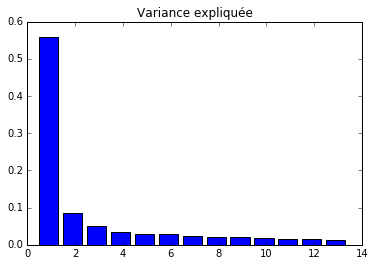

In [10]:
%matplotlib inline
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

In [11]:
X_reduced = pca.transform(df)
#i = np.identity(df.shape[1])
#coef = pca.transform(i)
#coef
#X_reduced_df = pandas.DataFrame(X_reduced)
#X_reduced_df.head(n=5)

# Random Forest pour sélection de variables 
On utilise le random forest sur toutes les variables à un seul instant (t=0) pour essayer de voir s'il y en a certaines qui se démarquent, en utilisant les importances de chacunes.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

t = []
for i in range(0,76) : 
    ind = i %7
    if(ind == 0):
        t.append(i)

t = np.asarray(t)
forest = RandomForestClassifier(n_estimators=5,
                              random_state=0)

forest.fit(df.iloc[:,t], y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
vraisIndices = t[indices]

([<matplotlib.axis.XTick at 0x7ad080>,
 <a list of 10 Text xticklabel objects>)

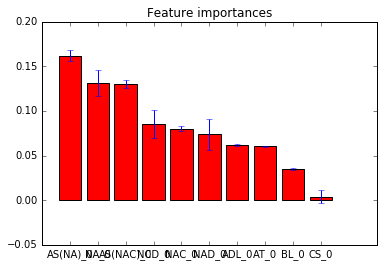

In [4]:
%matplotlib inline
plt.title("Feature importances")
plt.bar(range(1,len(t)), importances[indices][1:len(t)],
       color="r", yerr=std[indices[1:len(t)]], align="center")
plt.xticks(range(1,len(t)), df[vraisIndices[1:len(t)]].columns)

# Random forest sur toutes les variables

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5,
                              random_state=0)

forest.fit(df, y)
importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
 #            axis=0)
indices = np.argsort(importances)[::-1]

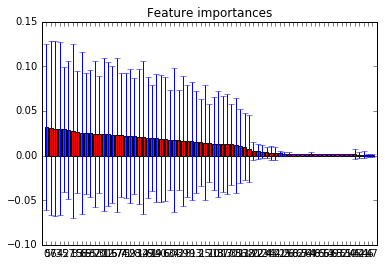

In [16]:
X = df

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

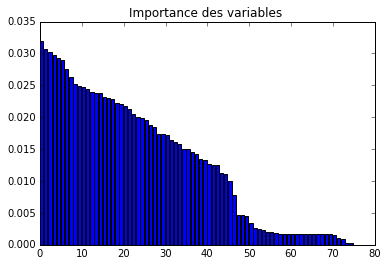

In [15]:
%matplotlib inline
plt.bar(range(X.shape[1]), importances[indices])
plt.title("Importance des variables ")

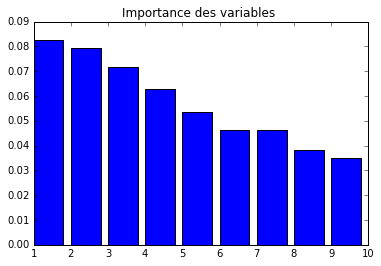

In [4]:
%matplotlib inline
plt.bar(range(1,10), importances[indices][1:10])
plt.title("Importance des variables ")

([<matplotlib.axis.XTick at 0x9cc3cf8>,
 <a list of 9 Text xticklabel objects>)

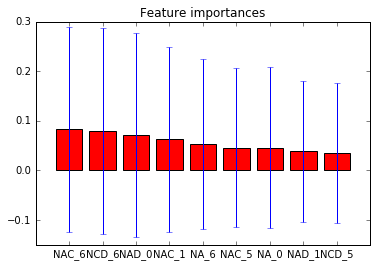

In [14]:
plt.title("Feature importances")
plt.bar(range(1,10), importances[indices][1:10],
       color="r", yerr=std[indices[1:10]], align="center")
plt.xticks(range(1,10), df[indices[1:10]].columns)

In [21]:
sum(importances[0:48])

0.67153481950719485

## Selection de features avec SelectModel

In [4]:
from sklearn.feature_selection import SelectFromModel
# threshold chosen is the mean (by default) (equivalent to importances[importances>np.mean(importances)])
model = SelectFromModel(forest, prefit=True)
X_new = model.transform(df)

In [8]:
test = pandas.DataFrame(X_new)
selectedVariables = df.columns[model.get_support(range(0,76))]

print("Les variables sélectionnées pour l'étude :",selectedVariables.tolist())


Les variables sélectionnées pour l'étude : ['NCD_6', 'AI_6', 'AS(NA)_6', 'BL_6', 'NAC_0', 'NAC_6', 'AS(NAC)_6', 'AT_6', 'NA_0', 'NA_6', 'ADL_6']


# Time series analysis

(DL model = Distributed Lag model ? ) On a un modèle du type séries temporelles :
$y_i = \delta_i + \displaystyle\sum_{k=0}^{6} \alpha_t ((NAD)_{t-k}) + \displaystyle\sum_{k=0}^{6}  \beta_t ((AI)_{t-k}) +\dots $
Estimer chaque bloc de 

In [52]:
import scikits.statsmodel.api as sm
sm.OLS(y,df).fit()

ImportError: No module named 'scikits'

chosiir la problematique
cross validation absolument
modele 2 qui ameliore les perfs
si le tps modele 1 stat vs modela 2 machine learnig